<a href="https://colab.research.google.com/github/filipabramowicz/ML_AI_course/blob/main/lab_03_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's load the data:

In [ ]:
#@title Multivariate regression with real data

# Nice printing
import pprint
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes()
pprint.pprint(diabetes)

names = diabetes["feature_names"]
print(names)

{'DESCR': '.. _diabetes_dataset:\n'
          '\n'
          'Diabetes dataset\n'
          '----------------\n'
          '\n'
          'Ten baseline variables, age, sex, body mass index, average blood\n'
          'pressure, and six blood serum measurements were obtained for each '
          'of n =\n'
          '442 diabetes patients, as well as the response of interest, a\n'
          'quantitative measure of disease progression one year after '
          'baseline.\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '  :Number of Instances: 442\n'
          '\n'
          '  :Number of Attributes: First 10 columns are numeric predictive '
          'values\n'
          '\n'
          '  :Target: Column 11 is a quantitative measure of disease '
          'progression one year after baseline\n'
          '\n'
          '  :Attribute Information:\n'
          '      - age     age in years\n'
          '      - sex\n'
          '      - bmi     body

In [ ]:
#@markdown Some information on our data

df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
# target is supposed to present the disease progression (whatever it means here)
df['progress'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progress
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Let's analyze our data:

In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progress
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


Let's check if we have some missing data:

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
bp          0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
progress    0
dtype: int64

No missing data.

And let's see the correlation within the data:

<Axes: >

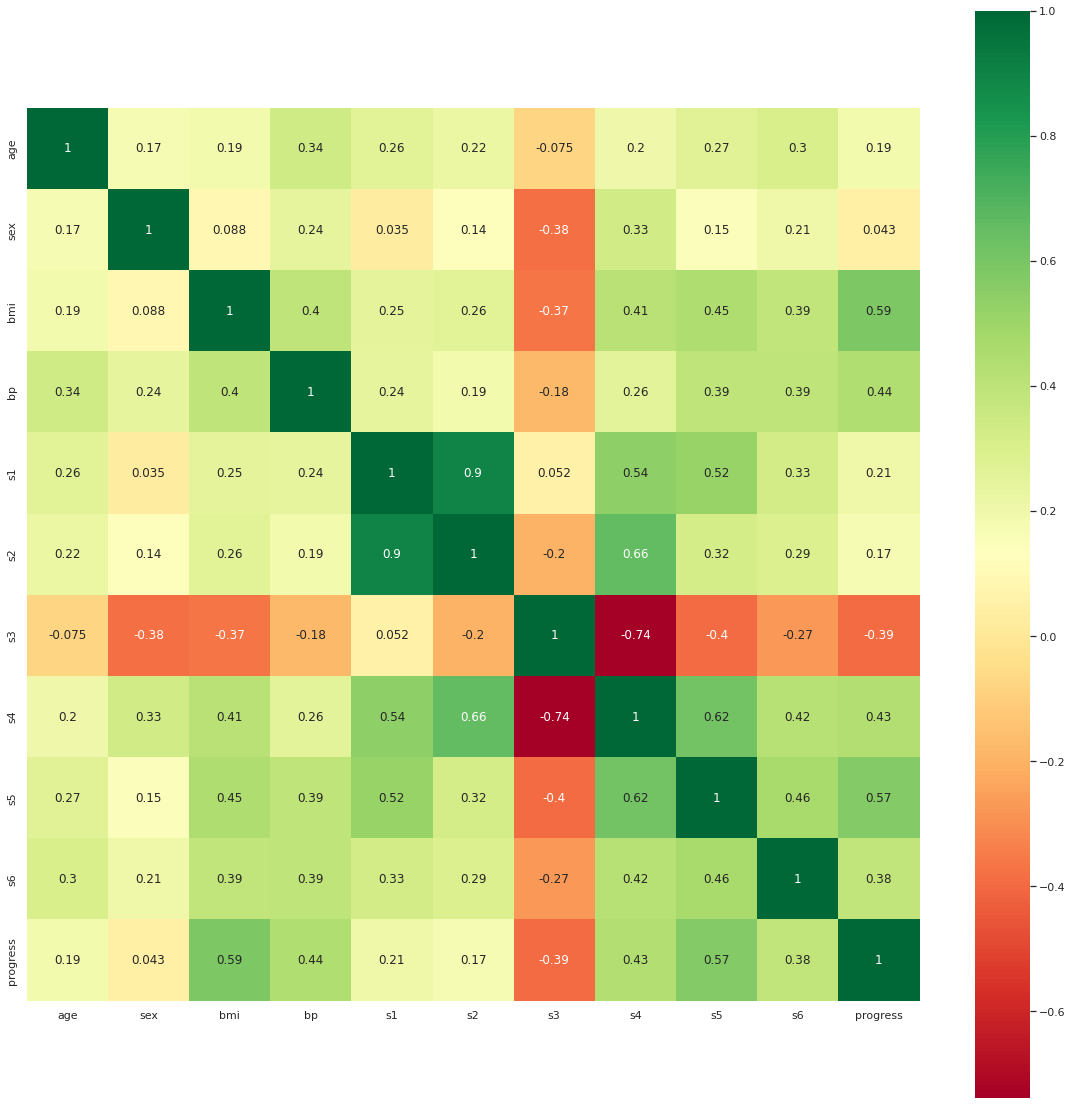

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, square=True, cmap='RdYlGn')

We can see that s2 is highly correlated with s1.
So we can simply remove s2 as it is not providing any new information to our model:

In [ ]:
print(df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  progress  
0   -0.002592  0.019907 -0.01

In [ ]:
df.shape

(442, 11)

In [ ]:
df1 = df.drop('s2', axis='columns')
df1.shape

(442, 10)

In [ ]:
print(df1)

          age       sex       bmi        bp        s1        s3        s4  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.043401 -0.002592   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449  0.074412 -0.039493   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.032356 -0.002592   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191 -0.036038  0.034309   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.008142 -0.002592   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.028674 -0.002592   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341 -0.028674  0.034309   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.024993 -0.011080   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318 -0.028674  0.026560   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.173816 -0.039493   

           s5        s6  progress  
0    0.019907 -0.017646     151.0  
1  

Also we can see very high corelation between s4 and s3. So let's remove s4:

In [ ]:
df2 = df1.drop('s4', axis='columns')
df2.shape

(442, 9)

In [ ]:
print(df2)

          age       sex       bmi        bp        s1        s3        s5  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.043401  0.019907   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449  0.074412 -0.068332   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.032356  0.002861   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191 -0.036038  0.022688   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.008142 -0.031988   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.028674  0.031193   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341 -0.028674 -0.018114   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.024993 -0.046883   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318 -0.028674  0.044529   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.173816 -0.004222   

           s6  progress  
0   -0.017646     151.0  
1   -0.092204      75.0

<Axes: xlabel='age', ylabel='Count'>

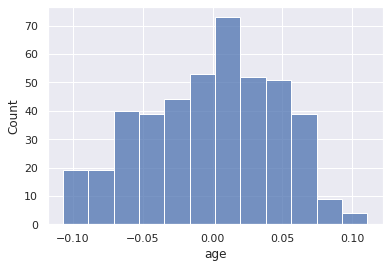

In [ ]:
sns.histplot(x='age', data=df2)

<Axes: xlabel='sex', ylabel='Count'>

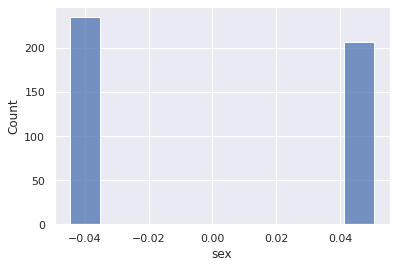

In [ ]:
sns.histplot(x='sex', data=df2)

<Axes: xlabel='bmi', ylabel='Count'>

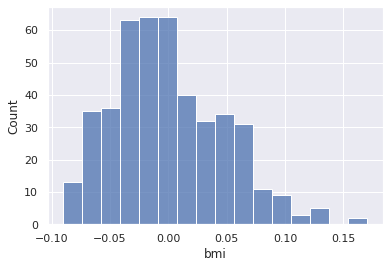

In [ ]:
sns.histplot(x='bmi', data=df2)

<Axes: xlabel='bp', ylabel='Count'>

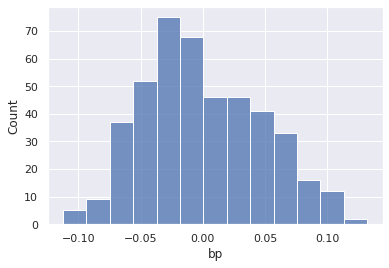

In [ ]:
sns.histplot(x='bp', data=df2)

<Axes: xlabel='s1', ylabel='Count'>

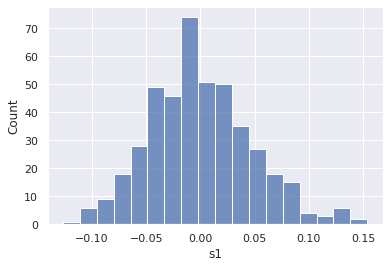

In [ ]:
sns.histplot(x='s1', data=df2)

<Axes: xlabel='s3', ylabel='Count'>

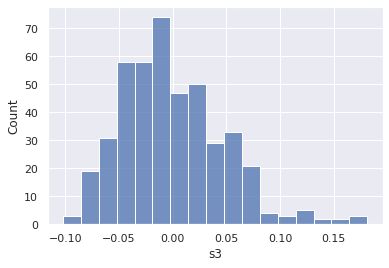

In [ ]:
sns.histplot(x='s3', data=df2)

<Axes: xlabel='s5', ylabel='Count'>

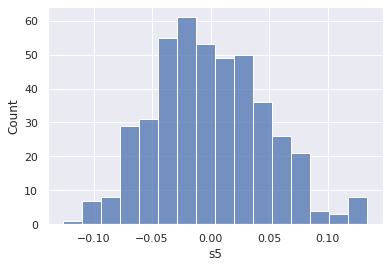

In [ ]:
sns.histplot(x='s5', data=df2)

<Axes: xlabel='s6', ylabel='Count'>

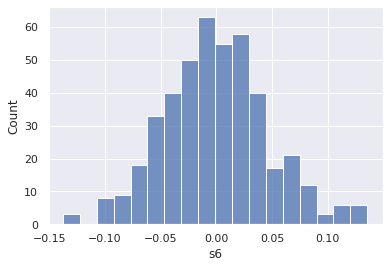

In [ ]:
sns.histplot(x='s6', data=df2)

Let's split the data into training data and test data:

In [ ]:
df3 = df2.iloc[:,:-1]
print(df3)

          age       sex       bmi        bp        s1        s3        s5  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.043401  0.019907   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449  0.074412 -0.068332   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.032356  0.002861   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191 -0.036038  0.022688   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.008142 -0.031988   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.028674  0.031193   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341 -0.028674 -0.018114   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.024993 -0.046883   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318 -0.028674  0.044529   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.173816 -0.004222   

           s6  
0   -0.017646  
1   -0.092204  
2   -0.025930  
3   -0.0093

In [ ]:
df4 = df2.iloc[:,-1:]
print(df4)

     progress
0       151.0
1        75.0
2       141.0
3       206.0
4       135.0
..        ...
437     178.0
438     104.0
439     132.0
440     220.0
441      57.0

[442 rows x 1 columns]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df3, df4, test_size=0.3, random_state=33)

Let's create a model (pipeline with scaler and linear regression) and train it with training data:

In [ ]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

scaler2 = preprocessing.StandardScaler()

# we call our linear regression model `sk_regr`
sk_regr = linear_model.LinearRegression()

pipe = Pipeline(
    steps = [
             ('z_scaling', scaler2),
             ('polynomial_regression', sk_regr)
    ]
)

pipe.fit(x_train, y_train)

Pipeline(steps=[('z_scaling', StandardScaler()),
                ('polynomial_regression', LinearRegression())])

Let's check the results:

In [ ]:
print(f'Coefficient = {sk_regr.coef_}')
print(f'Intercept = {sk_regr.intercept_}')
print(f'R^2 = {pipe.score(x_train, y_train)}')

Coefficient = [[ -0.45673392 -11.68634075  26.39373521  16.71763738 -10.34972693
  -13.52565737  25.21452332   2.47126776]]
Intercept = [154.18770227]
R^2 = 0.5264506083392717


Now, let's feed test data to our model:

In [ ]:
y_predict = pipe.predict(x_test)

Let's check the results:

In [ ]:
  from sklearn import metrics
  print(f'MAE: {metrics.mean_absolute_error(y_test, y_predict):.2f}')
  print(f'MSE: {metrics.mean_squared_error(y_test, y_predict):.2f}')
  print(f'R^2 = {pipe.score(x_test, y_test)}')

MAE: 43.80
MSE: 2928.24
R^2 = 0.46282837887754213


To be honest it's hard for me to interpret those values. I would expect them to be rather small (when the model is working correctly) however here we have MAE 43 and MSE 2928 :( Perhaps there is something wrong with this model.

If we just have a look into y_train and y_test without looking into model input data, the values seem to be in a similar range:

In [ ]:
print(y_test)

     progress
176     237.0
183     185.0
186     137.0
295      85.0
50      155.0
..        ...
123      84.0
62       52.0
72      202.0
402     168.0
250     303.0

[133 rows x 1 columns]


In [ ]:
print(y_predict)

[[158.74326388]
 [159.21770323]
 [195.26651703]
 [157.48862199]
 [165.48109108]
 [171.6260749 ]
 [227.48976812]
 [147.01374557]
 [146.03725105]
 [270.18302686]
 [284.3027265 ]
 [ 93.65016445]
 [216.0506968 ]
 [142.51801137]
 [166.2379937 ]
 [117.83667685]
 [160.74020839]
 [129.18155816]
 [131.78566764]
 [288.80796785]
 [167.92954811]
 [103.09521538]
 [267.64620758]
 [195.26462247]
 [173.16552804]
 [240.71949294]
 [117.76064092]
 [194.75078487]
 [ 98.71802178]
 [150.26323511]
 [104.1642545 ]
 [187.30460751]
 [257.30709173]
 [152.09555037]
 [125.7878475 ]
 [106.86787923]
 [ 84.35661287]
 [146.76684639]
 [129.81026567]
 [200.65098465]
 [ 93.85257203]
 [171.77881713]
 [176.26407853]
 [243.6231091 ]
 [215.7562989 ]
 [ 99.78685942]
 [161.26914387]
 [230.86064114]
 [ 93.3159077 ]
 [179.57773875]
 [112.57949668]
 [124.39179266]
 [232.82805355]
 [187.24739053]
 [ 97.63876378]
 [188.17960345]
 [ 94.38303134]
 [160.19452429]
 [113.69450287]
 [227.5886329 ]
 [148.9158088 ]
 [172.54262343]
 [271.65